### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [215]:
data = pd.read_csv('data/coupons.csv')

In [216]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: >

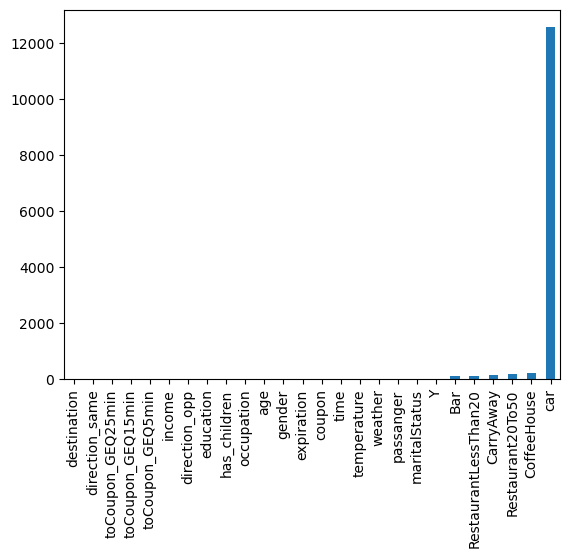

In [217]:
data.isnull().sum().sort_values().plot(kind = 'bar')


3. Decide what to do about your missing data -- drop, replace, other...

In [218]:
#fill missing Bar data with "never"
data['Bar'] = data['Bar'].fillna("never")


In [219]:
data["Bar"].count()

12684

In [220]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [221]:
#number of observations chose to accept the coupon
data.query("Y==1")["Y"].count()

7210

In [222]:
#percentage of observations chose to accept the coupon
data.query("Y==1")["Y"].count()/data["Bar"].count()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [223]:
import plotly.express as px
px.histogram(data, x="coupon", color = "Y")

6. Use a histogram to visualize the temperature column.

In [224]:
px.histogram(data, x="temperature", color = "Y")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [225]:
bar_coupon = data[data["coupon"]=="Bar"]
bar_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [226]:
#827 out of 2017 (41%) of the bar coupons were accpeted. 
#total number of bar coupons
bar_coupon["Y"].count()

2017

In [227]:
#number of bar coupons that were accepted
bar_coupon.query("Y==1")["Y"].count()

827

In [228]:
#percentage of bar coupons were accepted
bar_coupon.query("Y==1")["Y"].count()/bar_coupon["Y"].count()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [229]:
#acceptance rate of those who went to a bar 3 of fewer times a month is 37% = 500/1263
#acceptance rate of those who went more is 76% = 153/199
#never, less1, 1-3: total 
less3_total = bar_coupon.query("Bar=='never' or Bar=='less1' or Bar=='1~3'")["Y"].count()
less3_total

1818

In [230]:
#never, less1, 1-3: # of accepted
less3_accept = bar_coupon.query("(Bar=='never' or Bar=='less1' or Bar=='1~3') and Y==1")["Y"].count()
less3_accept

674

In [232]:
#never, less1, 1-3: acceptance rate
less3_acceptance_rate = less3_accept/less3_total
less3_acceptance_rate

0.37073707370737075

In [233]:
#4-8, gt8: total 
more3_total = bar_coupon.query("Bar=='4~8' or Bar=='gt8'")["Y"].count()
more3_total

199

In [234]:
#4-8, gt8: # of accepted
more3_accept = bar_coupon.query("(Bar=='4~8' or Bar=='gt8') and Y==1")["Y"].count()
more3_accept

153

In [235]:
#4-8, gt8: acceptance rate
more3_acceptance_rate = more3_accept/more3_total
more3_acceptance_rate

0.7688442211055276

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Based on my analysis, those visiting up to 3 times a month have an acceptance rate of 37% (500 out of 1,263), while the rate jumps to 76% (153 out of 199) for those visiting more often.

In [268]:
#1-3,4-8, gt8 & over 25: total 
more1_over25_total = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age>'21'")["Y"].count()
more1_over25_total

430

In [237]:
#1-3,4-8, gt8: accepted
more1_over25_accept = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age>'21'and Y==1")["Y"].count()
more1_over25_accept

296

In [238]:
#1-3,4-8, gt8: acceptance rate
more1_over25_acceptance_rate = more1_over25_accept/more1_over25_total
more1_over25_acceptance_rate

0.6883720930232559

In [239]:
#all the other: total
other_total = bar_coupon.query("not((Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age>'21')")["Y"].count()
other_total

1587

In [240]:
#other: accepted
other_accept = bar_coupon.query("not((Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age>'21') and Y==1")["Y"].count()
other_accept

531

In [241]:
#other: acceptance rate
other_acceptance_rate = other_accept/other_total
other_acceptance_rate

0.33459357277882795

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

Based on my analysis, in terms of drivers' acceptance rates based on their bar visits, passengers, and occupations, it's 71% (393 out of 551) for drivers visiting bars more than once a month and having adult passengers not engaged in farming, fishing, or forestry, compared to 29% (434 out of 1,466) for other drivers. 

In [242]:
#1-3,4-8, gt8 & passengers that were not a kid & had occupations other than farming, fishing, or forestry: total 
ans5_total = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(occupation == 'Farming Fishing & Forestry')")["Y"].count()
ans5_total

551

In [243]:
#1-3,4-8, gt8 & passengers that were not a kid & had occupations other than farming, fishing, or forestry: accepted 
ans5_accept = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(occupation == 'Farming Fishing & Forestry') and Y==1")["Y"].count()
ans5_accept

393

In [244]:
#1-3,4-8, gt8 & passengers that were not a kid & had occupations other than farming, fishing, or forestry: acceptance rate
ans5_acceptance_rate = ans5_accept/ans5_total
ans5_acceptance_rate

0.7132486388384754

In [245]:
#other: total 
ans5_other_total = bar_coupon.query("not((Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(occupation == 'Farming Fishing & Forestry'))")["Y"].count()
ans5_other_total

1466

In [246]:
#other: accepted 
ans5_other_accept = bar_coupon.query("not((Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(occupation == 'Farming Fishing & Forestry')) and Y==1")["Y"].count()
ans5_other_accept

434

In [247]:
#other: acceptance rate
ans5_other_acceptance_rate = ans5_other_accept/ans5_other_total
ans5_other_acceptance_rate

0.296043656207367

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 


Based on my analysis, this 71% acceptance rate remains consistent for drivers visiting bars more than once a month with adult passengers who are not widowed. Younger drivers, specifically those under 30 who visit bars more than once a month, have a higher acceptance rate of 73% (245 out of 335). Lastly, drivers who frequent cheap restaurants over 4 times a month and earn below 50K have a 46% (124 out of 271) acceptance rate.

In [248]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed: total
ans6_1_total = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(maritalStatus == 'Widowed')")["Y"].count()
ans6_1_total

551

In [249]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed: accepted
ans6_1_accept = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and not(passanger =='Kid(s)') and not(maritalStatus == 'Widowed') and Y==1")["Y"].count()
ans6_1_accept

393

In [250]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed: acceptance rate
ans6_1_rate = ans6_1_accept/ans6_1_total
ans6_1_rate

0.7132486388384754

In [251]:
#go to bars more than once a month and are under the age of 30: total
ans6_2_total = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age<'30'")["Y"].count()
ans6_2_total

335

In [252]:
#go to bars more than once a month and are under the age of 30: accepted
ans6_2_accept = bar_coupon.query("(Bar=='1~3' or Bar=='4~8' or Bar=='gt8') and age<'30' and Y==1")["Y"].count()
ans6_2_accept

245

In [253]:
#go to bars more than once a month and are under the age of 30: acceptance rate
ans6_2_rate = ans6_2_accept/ans6_2_total
ans6_2_rate

0.7313432835820896

In [256]:
#go to cheap restaurants more than 4 times a month and income is less than 50K: total
ans6_3_total = bar_coupon.query("(RestaurantLessThan20=='4~8' or RestaurantLessThan20=='gt8') and (income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999')")["Y"].count()
ans6_3_total

271

In [257]:
#go to cheap restaurants more than 4 times a month and income is less than 50K: accept
ans6_3_accept = bar_coupon.query("(RestaurantLessThan20=='4~8' or RestaurantLessThan20=='gt8') and (income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999') and Y==1")["Y"].count()
ans6_3_accept

124

In [258]:
#go to cheap restaurants more than 4 times a month and income is less than 50K: acceptance rate
ans6_3_rate = ans6_3_accept/ans6_3_total
ans6_3_rate

0.4575645756457565

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the data analysis, the following hypotheses can be generated:

1. **Frequency of Bar Visits**: There seems to be a direct correlation between the frequency of bar visits and acceptance rates. Individuals who visit bars more often are more likely to accept certain offers or participate in certain activities than those who visit less frequently.
   
2. **Occupation's Influence**: The occupation of a driver's passengers appears to influence acceptance rates. It's possible that certain occupations, specifically outside of farming, fishing, and forestry, might have lifestyle preferences or habits that align more closely with frequent bar visits and the associated offers.

3. **Marital Status and Bar Visits**: The marital status, specifically being non-widowed, might play a role in the likelihood of accepting certain offers during frequent bar visits. This could suggest that social settings or the nature of the offers are more appealing to those not experiencing recent bereavement.

4. **Age as a Factor**: Younger drivers, particularly those under 30, seem to be more inclined to accept offers or partake in activities associated with bar visits than their older counterparts. This could indicate that the offers or activities cater more to the preferences of a younger demographic.

5. **Economic Considerations**: Drivers with a certain economic profile, specifically those earning below 50K and frequenting cheaper dining options, have distinctive acceptance rates. This might imply that economic constraints or preferences influence the decision-making process of these drivers.

6. **General Behavior Pattern**: There's a pattern indicating that individuals with more frequent outings, whether to bars or restaurants, might be more socially active or open to certain offers than those with fewer outings.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [264]:
#based on the histogram plot, younger people (but over 21 years old) are more likely to accept bar coupons. 
px.histogram(bar_coupon, x = "age", color = "Y")

In [263]:
#based on the histogram plot, people are more likely to accept coupons on sunny days. 
px.histogram(bar_coupon, x = "weather", color = "Y")

In [261]:
#based on the historgram, people are more likely to accept bar coupon around 6pm (dinner time).
px.histogram(bar_coupon, x = "time", color = "Y")

In [262]:
#based on the histogram plot, single people are more likely to accept bar coupons. 
px.histogram(bar_coupon, x = "maritalStatus", color = "Y")